<a href="https://colab.research.google.com/github/Akasonal/Rain-Prediction/blob/main/Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
Rainfall Prediction is one of the most important task by proper prediction of rainfall we can reduce the difficulty in our day to day life. By accurate prediction of rainfall we can protect the crops of farmers.In this project by applying imputation of Australian weather dataset we will predict whether the rainfall will happen tommorow or not.

##Acquiring Dataset and Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df=pd.read_csv("weather.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## Data Preprocessing

In [3]:
df.shape  #printing shape rows and columns of dataframe

(142193, 24)

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
#Removing the date and locations columns because they both have  no role in rain prediction
df=df.drop(["Date","Location"],axis=1)

In [6]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
df.info()   #information about each columns in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        141556 non-null  float64
 1   MaxTemp        141871 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   Evaporation    81350 non-null   float64
 4   Sunshine       74377 non-null   float64
 5   WindGustDir    132863 non-null  object 
 6   WindGustSpeed  132923 non-null  float64
 7   WindDir9am     132180 non-null  object 
 8   WindDir3pm     138415 non-null  object 
 9   WindSpeed9am   140845 non-null  float64
 10  WindSpeed3pm   139563 non-null  float64
 11  Humidity9am    140419 non-null  float64
 12  Humidity3pm    138583 non-null  float64
 13  Pressure9am    128179 non-null  float64
 14  Pressure3pm    128212 non-null  float64
 15  Cloud9am       88536 non-null   float64
 16  Cloud3pm       85099 non-null   float64
 17  Temp9am        141289 non-nul

In [8]:
df.isnull().values.any()   #is any null value present in dataset 

True

In [9]:
df.isnull().sum()  #number of null values present in each features

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [10]:
#filling the null value in numerical columns
def fill_num_null(data,cols):
  if data[cols].dtypes=="float64":
    if data[cols].isnull().values.any():
      data[cols]=data[cols].fillna(data[cols].value_counts().keys()[0])  #filling with mode
  return data[cols]
for i in df.columns:
  fill_num_null(df,i)


In [11]:
df.isnull().sum()

MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [12]:
#Mapping rain today features with 0 and 1
df["RainToday"]=df["RainToday"].map({"Yes":1,"No":0})
#Mapping rain tommorow features with 0 and 1(it i an output label)
df["RainTomorrow"]=df["RainTomorrow"].map({"Yes":1,"No":0})

In [13]:
#printing all the categorical columns
cat_features={}
for j in df.columns:
  if df[j].dtype=="object":
    df[j]=df[j].astype(str)    #typecasting is used to convert nan into string
    label_encoder=LabelEncoder()
    df[j]=label_encoder.fit_transform(df[j])

In [14]:
#filling the null values present in column having object type integer
df["RainToday"]=df["RainToday"].fillna(df["RainToday"].value_counts().keys()[0])

In [15]:
df.isnull().sum()   #checking if there any null value left

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [16]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0.0,0.0,0
1,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0.0,0.0,0
2,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0.0,0.0,0
3,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0.0,1.0,0
4,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


Checking whether datasety is balanced or not

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


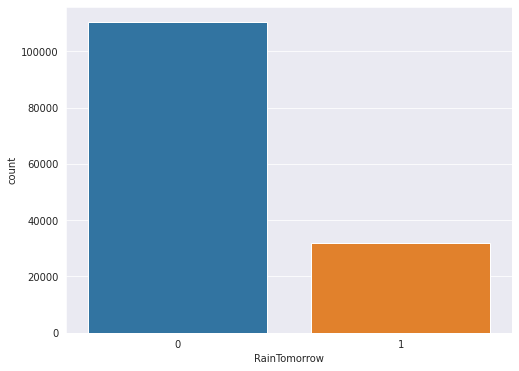

In [17]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(df["RainTomorrow"])
plt.show()

In [18]:
#As we see above data is imbalanced hence we will try to balance the data
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [19]:
over_sampling=RandomOverSampler()
X_os,Y_os=over_sampling.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [20]:
df=pd.DataFrame(X_os,columns=X.columns)
df["RainTomorrow"]=Y_os

In [21]:
df.head()   #dataframe after balancing

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,4.0,0.0,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0.0,0.0,0
1,7.4,25.1,0.0,4.0,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0.0,0.0,0
2,12.9,25.7,0.0,4.0,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0.0,0.0,0
3,9.2,28.0,0.0,4.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0.0,1.0,0
4,17.5,32.3,1.0,4.0,0.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


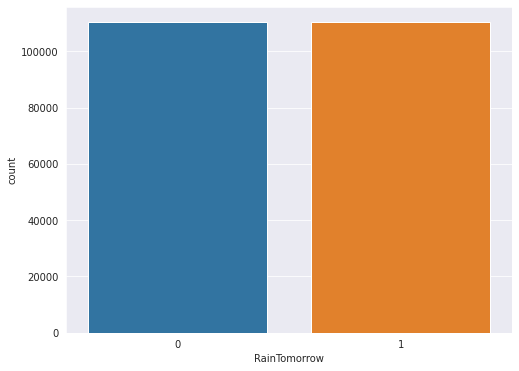

In [22]:
#visual representation of balanced dataset
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(df["RainTomorrow"])
plt.show()

##  outliers detection and removal

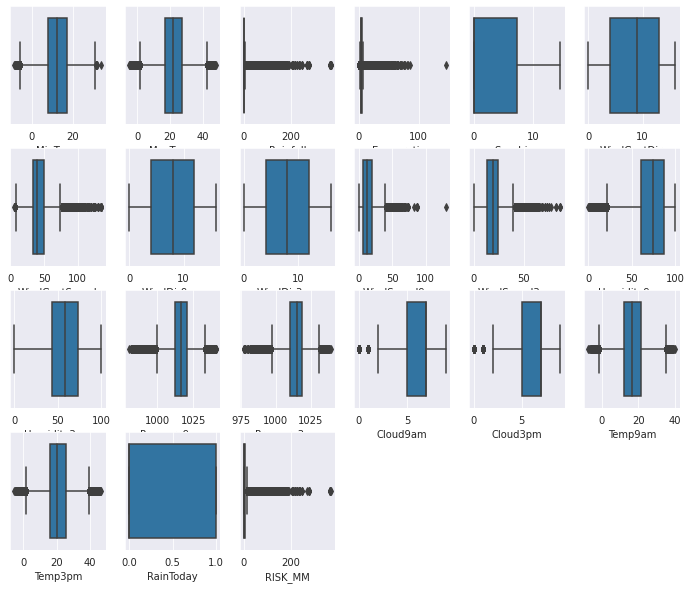

In [23]:
#outlier detection using boxplot
import warnings
plt.figure(figsize=(12,10))
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
j=1
for i in df.columns:
  if i!="RainTomorrow":
      if j<=len(df.columns):
          plt.subplot(4,6,j)
          sns.boxplot(df[i])
  j+=1
plt.show()

As we see above figure we can conclude that whatever values is away from inter quantile range would be considered as outliers

In [24]:
from sklearn.ensemble import IsolationForest
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
print(X.shape)
print(Y.shape)

(220632, 21)
(220632,)


In [25]:
iso_f=IsolationForest(contamination="auto")
y_pred=iso_f.fit_predict(X)
y_pred


array([1, 1, 1, ..., 1, 1, 1])

In [26]:
mask= y_pred !=-1
X1=X.values[mask,:]   #X is in arary format and all the outliers has been filtered

In [27]:
Y1=Y[mask]             #Filtering all the outliers 

In [28]:
Y1.isnull().sum()

0

In [29]:
df_final=pd.DataFrame(data=X1,columns=[X.columns])
df_final["RainTomorrow"]=Y1   

In [30]:
df_final.isnull().sum()

MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow     27295
dtype: int64

In [31]:
df_final=df_final.dropna()

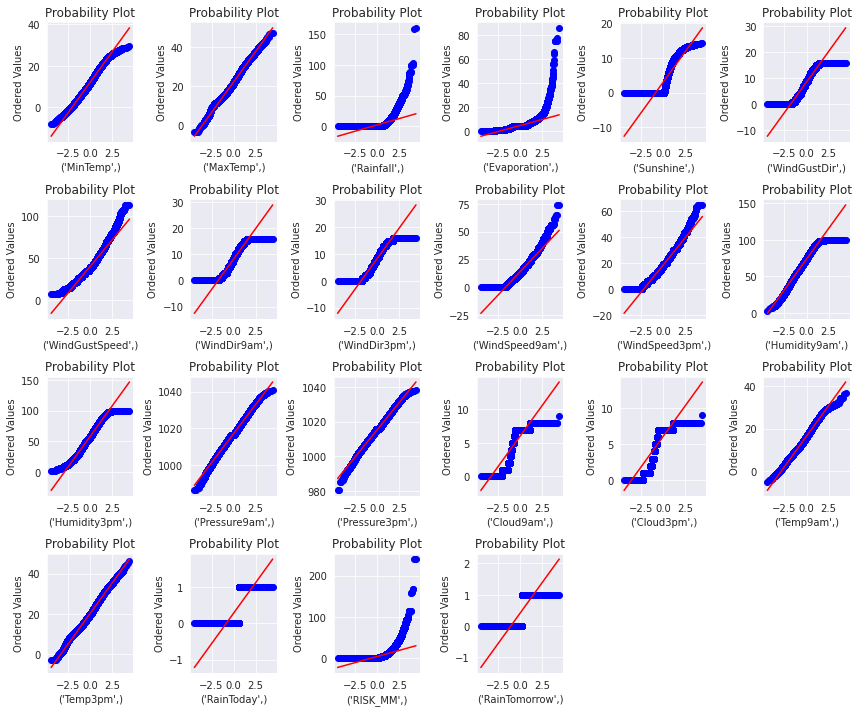

In [32]:
from scipy.stats import probplot
plt.figure(figsize=(12,10))
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
j=1
for i in df_final.columns:
  if i!="RainTomorrow":
      if j<=len(df_final.columns):
          plt.subplot(4,6,j)
          probplot(df_final[i],plot=plt)
          plt.xlabel(i,fontsize=10)
  j+=1
plt.tight_layout()
plt.show()

## Visualization of Data

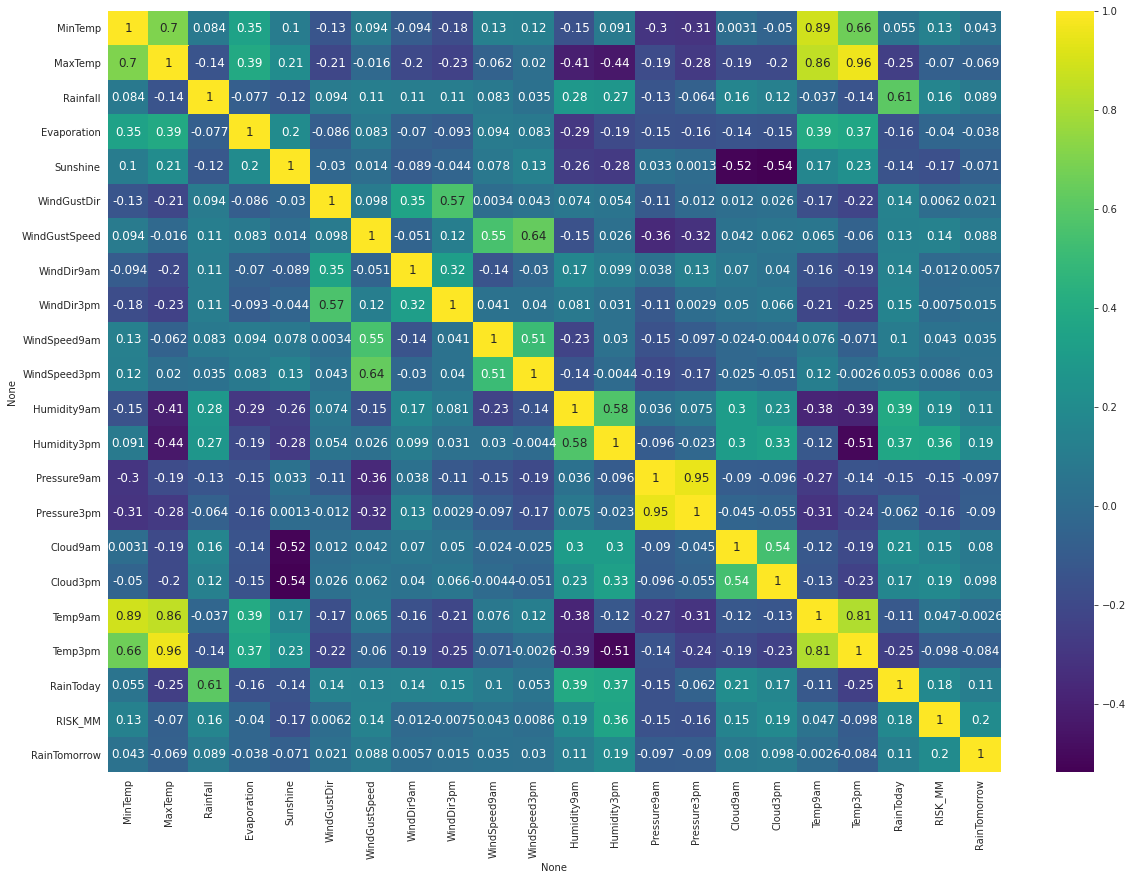

In [33]:
#checking the correlation of data
sns.set_style("darkgrid")
corr=df_final.corr()
plt.figure(figsize=(20,14))
sns.heatmap(corr,annot=True,cmap="viridis",annot_kws={"size":12})
plt.show()

## Selecting Best feature for prediction uysing chi squared test

In [34]:
x_final=df_final.iloc[:,:-1]
Y_final=df_final.iloc[:,-1]
from sklearn.preprocessing import MinMaxScaler   #taken normalization to fit data into range of o to 1
scaler=MinMaxScaler()
X_standard=scaler.fit_transform(x_final)
X_standard[0]
X_final=pd.DataFrame(X_standard,columns=x_final.columns)
X_final.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,0.569921,0.525591,0.003755,0.046404,0.0,0.8125,0.349057,0.8125,0.8750,0.270270,0.369231,0.701031,0.212121,0.392336,0.461407,0.888889,0.777778,0.529976,0.503055,0.0,0.000000
1,0.411609,0.568898,0.000000,0.046404,0.0,0.8750,0.349057,0.3750,0.9375,0.054054,0.338462,0.422680,0.242424,0.445255,0.473413,0.777778,0.777778,0.537170,0.553971,0.0,0.000000
2,0.556728,0.580709,0.000000,0.046404,0.0,0.9375,0.367925,0.8125,0.9375,0.256757,0.400000,0.360825,0.292929,0.390511,0.488851,0.777778,0.222222,0.628297,0.531568,0.0,0.000000
3,0.459103,0.625984,0.000000,0.046404,0.0,0.2500,0.160377,0.5625,0.0000,0.148649,0.138462,0.432990,0.151515,0.572993,0.559177,0.777778,0.777778,0.558753,0.598778,0.0,0.004167
4,0.678100,0.710630,0.006258,0.046404,0.0,0.8125,0.320755,0.0625,0.4375,0.094595,0.307692,0.814433,0.323232,0.448905,0.442539,0.777778,0.888889,0.551559,0.663951,0.0,0.000833


In [35]:
from sklearn.feature_selection import chi2
f_values=chi2(X_final,Y_final)
f_values[1]  #chi2 return two values at [0] it returns f_value and at [1] it returns p_value
#we will eliminated less importannt using p_values 

array([2.40713023e-04, 1.27609199e-06, 1.45402950e-28, 6.32445338e-02,
       1.00745556e-70, 6.49537343e-04, 3.72931589e-14, 3.39097060e-01,
       1.52136952e-02, 1.88433623e-04, 2.76486558e-03, 2.04917502e-18,
       4.30779460e-90, 1.67000689e-09, 4.24854938e-07, 1.04381466e-21,
       7.33342426e-27, 8.42307301e-01, 1.22294420e-09, 0.00000000e+00,
       3.64171132e-94])

In [36]:
#plotting these features
p_values=pd.Series(f_values[1],index=X_final.columns)
p_values=p_values.sort_values(ascending=True)
p_values.head()

RainToday      0.000000e+00
RISK_MM        3.641711e-94
Humidity3pm    4.307795e-90
Sunshine       1.007456e-70
Rainfall       1.454029e-28
dtype: float64

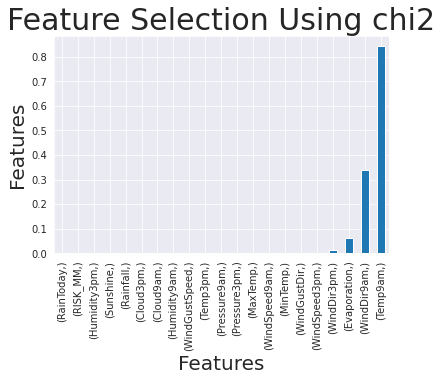

In [37]:
p_values.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("Features",fontsize=20)
plt.title("Feature Selection Using chi2",fontsize=30)
plt.show()

In [38]:
from sklearn.feature_selection import SelectKBest
selector=SelectKBest(chi2,k=10)  #selecting top 10 features
selector.fit(X_final,Y_final)
X_new=selector.transform(X_final)
columns=X_final.columns[selector.get_support(indices=True)]
columns

MultiIndex([(     'Rainfall',),
            (     'Sunshine',),
            ('WindGustSpeed',),
            (  'Humidity9am',),
            (  'Humidity3pm',),
            (     'Cloud9am',),
            (     'Cloud3pm',),
            (      'Temp3pm',),
            (    'RainToday',),
            (      'RISK_MM',)],
           )

In [39]:
features=df_final[columns]
target=Y_final

In [40]:
features.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RISK_MM
0,0.6,0.0,44.0,71.0,22.0,8.0,7.0,21.8,0.0,0.0
1,0.0,0.0,44.0,44.0,25.0,7.0,7.0,24.3,0.0,0.0
2,0.0,0.0,46.0,38.0,30.0,7.0,2.0,23.2,0.0,0.0
3,0.0,0.0,24.0,45.0,16.0,7.0,7.0,26.5,0.0,1.0
4,1.0,0.0,41.0,82.0,33.0,7.0,8.0,29.7,0.0,0.2


In [41]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: (RainTomorrow,), dtype: float64

## Model Selection Step

In [42]:
#Splitting the data into train and test set
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(128973, 10)
(128973,)
(32244, 10)
(32244,)


In [43]:
#selecting best fit model using kfold cross validation
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
models=[]
models.append(("LR",LogisticRegression()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("XGB",XGBClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("KNN",KNeighborsClassifier()))
result=[]
names=[]
for name,model in models:
  kfold=KFold(n_splits=10,shuffle=True,random_state=1)
  score=cross_val_score(model,X_train,Y_train,cv=kfold,scoring="accuracy")
  result.append(score)
  names.append(name)
  print(f"model {name} has mean score {score.mean()} and deviation {score.std()}")

model LR has mean score 0.6299535624364869 and deviation 0.0037156200193800407
model CART has mean score 0.5583571954147051 and deviation 0.003832939619318857
model XGB has mean score 0.6933001808897681 and deviation 0.0037277445929107486
model RF has mean score 0.6416537462695265 and deviation 0.004915479319508234
model KNN has mean score 0.6059252463363813 and deviation 0.003995129333465762


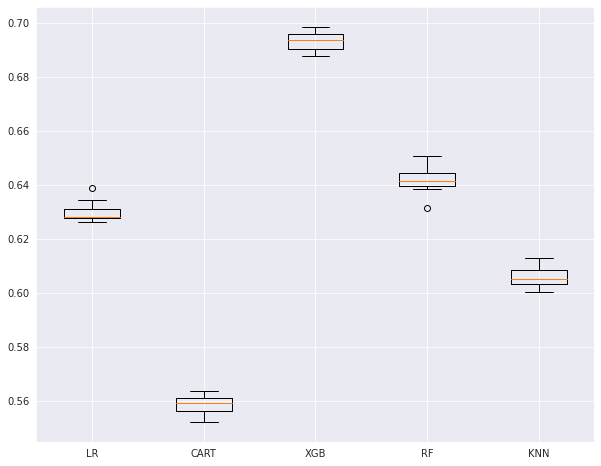

In [44]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
plt.boxplot(result,labels=names)
plt.show()

As we can observe from above doagram we canconclude that Xgboost is giving better accuracy out of all the other models hence we will select Xgboost for the further implementation

## HyperParameter Tuning

In [45]:
param_grid={"n_esmtimators":[100,120,130],
            "min_child_weight":[1,5],
            "max_depth":[6,8,]
            }

In [46]:
from sklearn.model_selection import GridSearchCV
xgb=XGBClassifier()
grid_cv=GridSearchCV(xgb,param_grid=param_grid,cv=5,n_jobs=-1)
grid_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [6, 8], 'min_child_weight': [1, 5],
                         'n_esmtimators': [100, 120, 130]},
             pre_dispatch='2*n_jobs', refit=T

In [47]:
grid_cv.best_params_

{'max_depth': 6, 'min_child_weight': 5, 'n_esmtimators': 100}

In [48]:
grid_cv.best_score_

0.6923852030362744

In [51]:
grid_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_esmtimators=100,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

## Modeling and Prediction

In [52]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_esmtimators=100,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [54]:
xgb.fit(X_train,Y_train)    #fitting the training set into model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_esmtimators=100,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [55]:
y_predicted=xgb.predict(X_test)
y_predicted

array([1., 0., 0., ..., 0., 0., 1.])

In [59]:
print(accuracy_score(y_predicted,Y_test))

0.6905470785262374


In [63]:
import scikitplot as splt
from sklearn import metrics
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_predicted,Y_test))

              precision    recall  f1-score   support

         0.0       0.67      0.77      0.72     16570
         1.0       0.72      0.60      0.65     15674

    accuracy                           0.69     32244
   macro avg       0.69      0.69      0.69     32244
weighted avg       0.69      0.69      0.69     32244



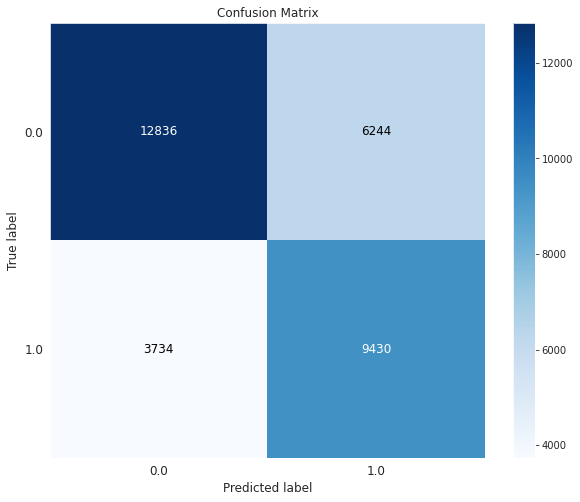

In [65]:
splt.metrics.plot_confusion_matrix(Y_test,y_predicted,text_fontsize="large",figsize=(10,8))

Here we should have very less amount of TN and this satisfies here hence out model has quite good validation for rain prediction

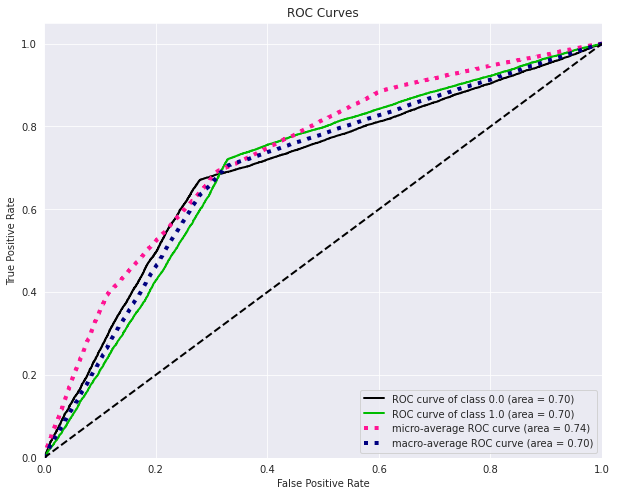

In [70]:
splt.metrics.plot_roc_curve(Y_test,xgb.predict_proba(X_test),figsize=(10,8))

## Final Observation

In [73]:
Result=pd.DataFrame({"Actual":Y_test,"Predicted":y_predicted})
Result.head(20)

,Actual,Predicted
130893,1.0,1.0
97559,0.0,0.0
40753,1.0,0.0
184020,1.0,1.0
89992,1.0,0.0
20736,0.0,0.0
125342,0.0,1.0
183811,1.0,1.0
72765,0.0,0.0
155036,1.0,1.0


<Figure size 720x576 with 0 Axes>

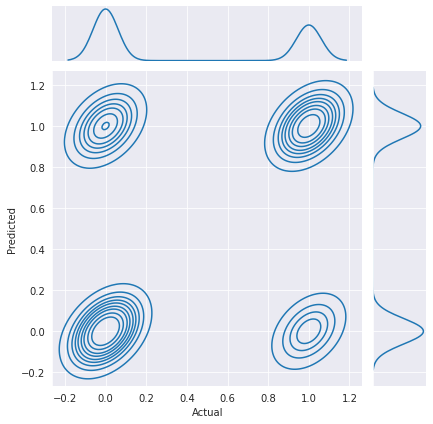

In [85]:
#plotting the final output
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
sns.jointplot(Result.Actual,Result.Predicted,kind="kde")
plt.show()